In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("./data/SAFI_clean.csv")
df.head()

,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID
0,1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,NaN,NaN,1,bicycle;television;solar_panel;table,2,Jan,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,1,God,2016-11-17T00:00:00Z,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;...,2,Jan;Sept;Oct;Nov;Dec,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,3,God,2016-11-17T00:00:00Z,10,15,burntbricks,1,NaN,NaN,1,solar_torch,2,Jan;Feb;Mar;Oct;Nov;Dec,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,4,God,2016-11-17T00:00:00Z,7,6,burntbricks,1,NaN,NaN,2,bicycle;radio;cow_plough;solar_panel;mobile_phone,2,Sept;Oct;Nov;Dec,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,5,God,2016-11-17T00:00:00Z,7,40,burntbricks,1,NaN,NaN,4,motorcyle;radio;cow_plough;mobile_phone,2,Aug;Sept;Oct;Nov,uuid:2c867811-9696-4966-9866-f35c3e97d02d


# Situation

This data analyzes the assets by everyone in each specific village. It displays how many people live in a house in the village, how long they've lived there, and overall what other assets they may or may not have. 

The dataset contains 131 rows and 14 columns, with all different kind of data. Our goal from this dataset would be to analyze the why do people lack food in certain months, and not in certain months.

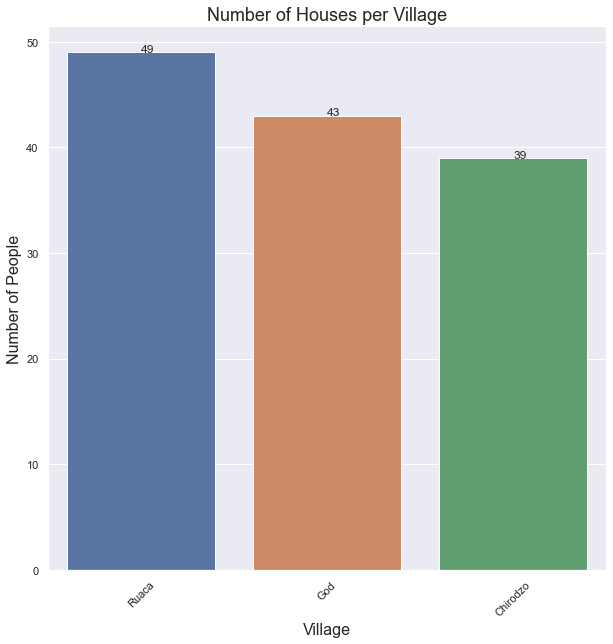

In [3]:
village_count = df['village'].value_counts()

plt.figure(figsize=(10, 10))

# Create barplot using seaborn
sns.set(style="darkgrid")
ax = sns.barplot(x=village_count.index, y=village_count.values)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()))

# Add title and axis labels
plt.title('Number of Houses per Village', fontsize=18)
plt.xlabel('Village', fontsize=16)
plt.ylabel('Number of People', fontsize=16)
plt.xticks(rotation=45)


# Show the plot
plt.show()

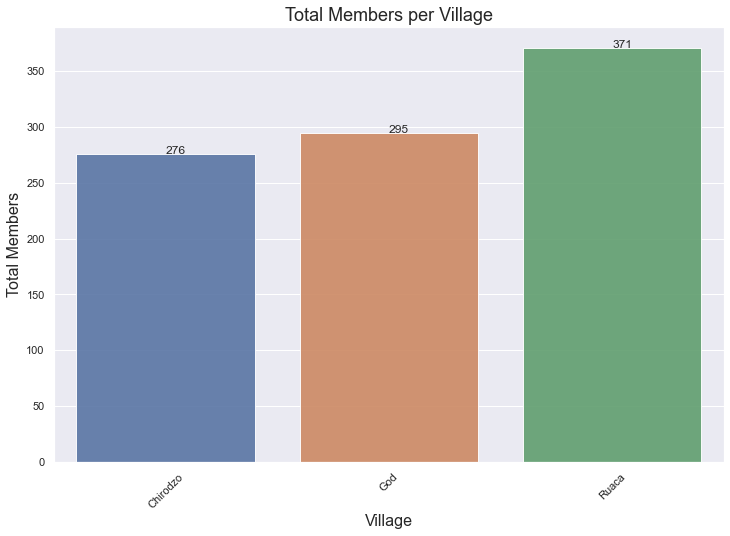

In [4]:
village_members = df.groupby('village')['no_membrs'].sum()

sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
ax = sns.barplot(x=village_members.index, y=village_members.values, alpha=0.9)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()))

plt.title('Total Members per Village', fontsize=18)
plt.xlabel('Village', fontsize=16)
plt.ylabel('Total Members', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Problem

We want to find the variables which have the biggest correlation with why some people do not have food in certain months. The goal is to find a pattern and see if that can be construed as a proper correlation which can be used to solve the problem.

# Solution

In [40]:
def convert_to_numeric(months_str):
    month_dict = {'none':0, 'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                  'July': 7, 'Aug': 8, 'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    months_list = months_str.split(';')
    months_numeric = []
    for month in months_list:
        try:
            month_numeric = int(month)
        except ValueError:
            month = month.strip() # strip whitespace characters
            month_numeric = month_dict.get(month, 0) # use get method with default value
        months_numeric.append(month_numeric)
    total_months = sum(months_numeric)
    return total_months

In [41]:
df['months_lack_food_numeric'] = df['months_lack_food'].apply(lambda x: convert_to_numeric(x))




In [42]:
df

,key_ID,village,interview_date,no_membrs,years_liv,respondent_wall_type,rooms,memb_assoc,affect_conflicts,liv_count,items_owned,no_meals,months_lack_food,instanceID,months_lack_food_numeric
0,1,God,2016-11-17T00:00:00Z,3,4,muddaub,1,NaN,NaN,1,bicycle;television;solar_panel;table,2,1,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef,1
1,1,God,2016-11-17T00:00:00Z,7,9,muddaub,1,yes,once,3,cow_cart;bicycle;radio;cow_plough;solar_panel;...,2,1;9;10;11;12,uuid:099de9c9-3e5e-427b-8452-26250e840d6e,43
2,3,God,2016-11-17T00:00:00Z,10,15,burntbricks,1,NaN,NaN,1,solar_torch,2,1;2;3;10;11;12,uuid:193d7daf-9582-409b-bf09-027dd36f9007,39
3,4,God,2016-11-17T00:00:00Z,7,6,burntbricks,1,NaN,NaN,2,bicycle;radio;cow_plough;solar_panel;mobile_phone,2,9;10;11;12,uuid:148d1105-778a-4755-aa71-281eadd4a973,42
4,5,God,2016-11-17T00:00:00Z,7,40,burntbricks,1,NaN,NaN,4,motorcyle;radio;cow_plough;mobile_phone,2,8;9;10;11,uuid:2c867811-9696-4966-9866-f35c3e97d02d,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,126,Ruaca,2017-05-18T00:00:00Z,3,7,burntbricks,1,no,more_once,3,motorcyle;radio;solar_panel,3,10;11;12,uuid:69caea81-a4e5-4e8d-83cd-9c18d8e8d965,33
127,193,Ruaca,2017-06-04T00:00:00Z,7,10,cement,3,no,more_once,3,car;lorry;television;radio;sterio;cow_plough;s...,3,0,uuid:5ccc2e5a-ea90-48b5-8542-69400d5334df,0
128,194,Ruaca,2017-06-04T00:00:00Z,4,5,muddaub,1,no,more_once,1,radio;solar_panel;solar_torch;mobile_phone,3,9;10;11,uuid:95c11a30-d44f-40c4-8ea8-ec34fca6bbbf,30
129,199,Chirodzo,2017-06-04T00:00:00Z,7,17,burntbricks,2,yes,more_once,2,cow_cart;lorry;motorcyle;computer;television;r...,3,11;12,uuid:ffc83162-ff24-4a87-8709-eff17abc0b3b,23


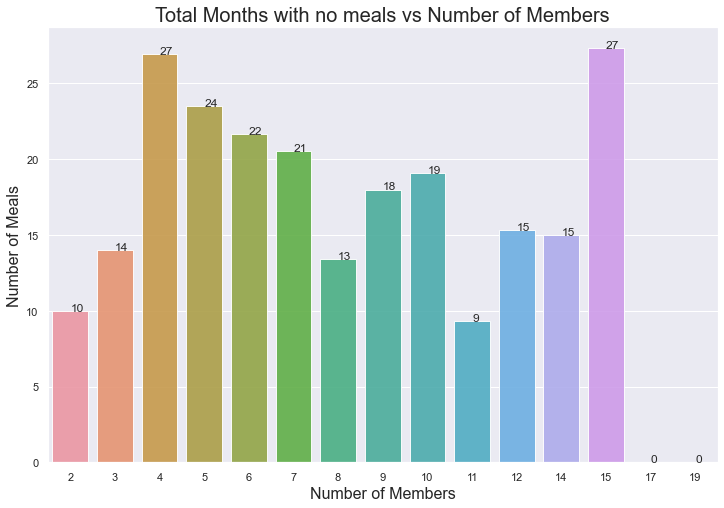

In [48]:
meal_count = df.groupby('no_membrs')['months_lack_food_numeric'].mean()

sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
ax = sns.barplot(x=meal_count.index, y=meal_count.values, alpha=0.9)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()))

plt.title('Total Months with No meals vs Number of Members', fontsize=20)
plt.xlabel('Number of Members', fontsize=16)
plt.ylabel('Number of Meals Missed', fontsize=16)
plt.show()


In [54]:
# Map values to numeric
mapping = {'yes': 1, 'no': 0, 'NULL': 0}
df['member_assoc_numeric'] = df['memb_assoc'].map(mapping)

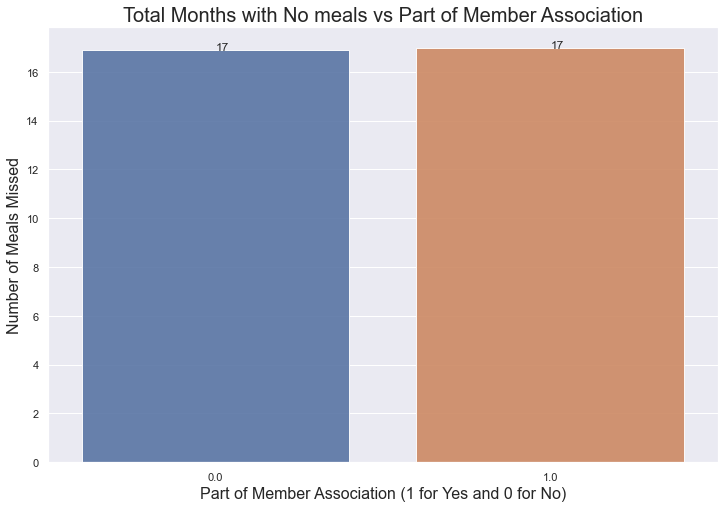

In [56]:
memb_associated = df.groupby('member_assoc_numeric')['months_lack_food_numeric'].mean()

sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
ax = sns.barplot(x=memb_associated.index, y=memb_associated.values, alpha=0.9)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()))

plt.title('Total Months with No meals vs Part of Member Association', fontsize=20)
plt.xlabel('Part of Member Association (1 for Yes and 0 for No)', fontsize=16)
plt.ylabel('Number of Meals Missed', fontsize=16)
plt.show()


In [57]:
# Map values to numeric
mapping = {'never': 0, 'once': 1, 'more_once': 2, 'frequently': 3, 'NULL': np.nan}
df['affect_conflicts_numeric'] = df['affect_conflicts'].map(mapping)


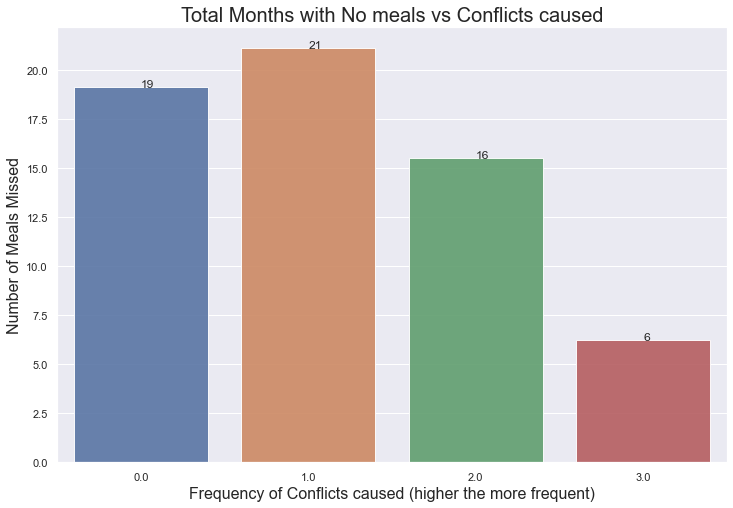

In [61]:
affect_conflicts = df.groupby('affect_conflicts_numeric')['months_lack_food_numeric'].mean()

sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
ax = sns.barplot(x=affect_conflicts.index, y=affect_conflicts.values, alpha=0.9)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()))

plt.title('Total Months with No meals vs Conflicts caused', fontsize=20)
plt.xlabel('Frequency of Conflicts caused (higher the more frequent)', fontsize=16)
plt.ylabel('Number of Meals Missed', fontsize=16)
plt.show()


In [65]:
df['total_items_owned'] = (df['items_owned'].str.count(';') + 1)

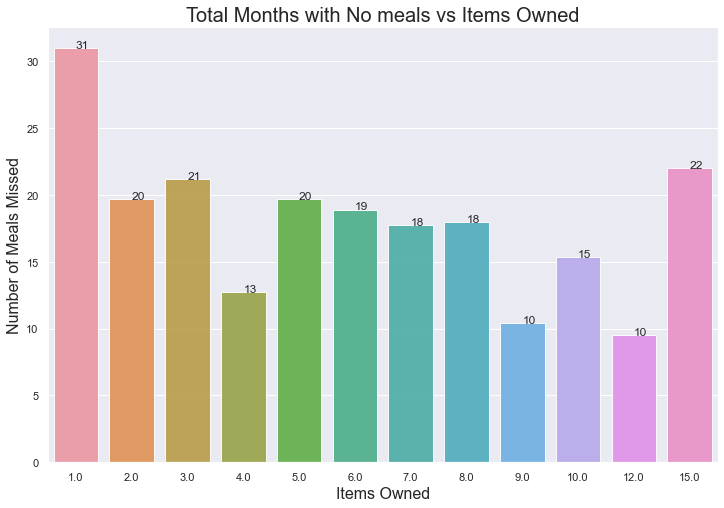

In [68]:
item_owned = df.groupby('total_items_owned')['months_lack_food_numeric'].mean()

sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
ax = sns.barplot(x=item_owned.index, y=item_owned.values, alpha=0.9)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()))

plt.title('Total Months with No meals vs Items Owned', fontsize=20)
plt.xlabel('Items Owned', fontsize=16)
plt.ylabel('Number of Meals Missed', fontsize=16)
plt.show()


W